# Eda Practice 1

KETERANGAN KOLOM:
1. Age = Umur
2. Salary = Gaji
3. Education Level = Tingkat Pendidikan
4. Years Experience = Pengalaman 
5. Department = Jabatan
6. Left Company = Kemungkinan Karyawan Akan Resign (Target)

### A.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv('eda_practice.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")


Berhasil Membaca Data


### A.3 Cek Dimensi Data

In [3]:
df.shape

(8, 6)

In [4]:
df.head()

,age,salary,education_level,years_experience,department,left_company
0,23,3200,SMA,1,IT,0
1,45,5400,S1,12,Finance,1
2,31,4100,D3,5,HR,0
3,52,7200,S2,20,IT,1
4,27,3900,SMA,3,Marketing,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               8 non-null      int64 
 1   salary            8 non-null      int64 
 2   education_level   8 non-null      object
 3   years_experience  8 non-null      int64 
 4   department        8 non-null      object
 5   left_company      8 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 516.0+ bytes


In [82]:
df['education_level'].unique()

array(['SMA', 'S1', 'D3', 'S2'], dtype=object)

In [83]:
df['department'].unique()

array(['IT', 'Finance', 'HR', 'Marketing'], dtype=object)

### A.4 Nilai Duplikasi

In [84]:
df.duplicated().sum()

np.int64(0)

### A.5 Nilai Hilang

In [85]:
df.isna().sum()

age                 0
salary              0
education_level     0
years_experience    0
department          0
left_company        0
dtype: int64

### A.6 Encoding

In [86]:
mapping_education = {'SMA' : 0, 
                     'S1' : 1, 
                     'D3' : 2, 
                     'S2' : 3}
df['education_level'] = df['education_level'].map(mapping_education)

In [87]:
mapping_department = {'IT' : 0, 
                     'Finance' : 1, 
                     'HR' : 2, 
                     'Marketing' : 3}
df['department'] = df['department'].map(mapping_department)

### A.7 Analisis Statistik Deskriptif

In [88]:
df.describe()

,age,salary,education_level,years_experience,department,left_company
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,37.750000,5012.500000,1.500000,9.500000,1.500000,0.375000
std,10.333717,1401.466069,1.195229,6.866066,1.195229,0.517549
min,23.000000,3200.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,4050.000000,0.750000,4.500000,0.750000,0.000000
50%,38.000000,4750.000000,1.500000,8.500000,1.500000,0.000000
75%,45.750000,5750.000000,2.250000,13.500000,2.250000,1.000000
max,52.000000,7200.000000,3.000000,20.000000,3.000000,1.000000


In [89]:
df.var()

age                 1.067857e+02
salary              1.964107e+06
education_level     1.428571e+00
years_experience    4.714286e+01
department          1.428571e+00
left_company        2.678571e-01
dtype: float64

In [90]:
Range = df.max() - df.min()
Range

age                   29
salary              4000
education_level        3
years_experience      19
department             3
left_company           1
dtype: int64

### A.8 Analisis Distribusi & Outliers

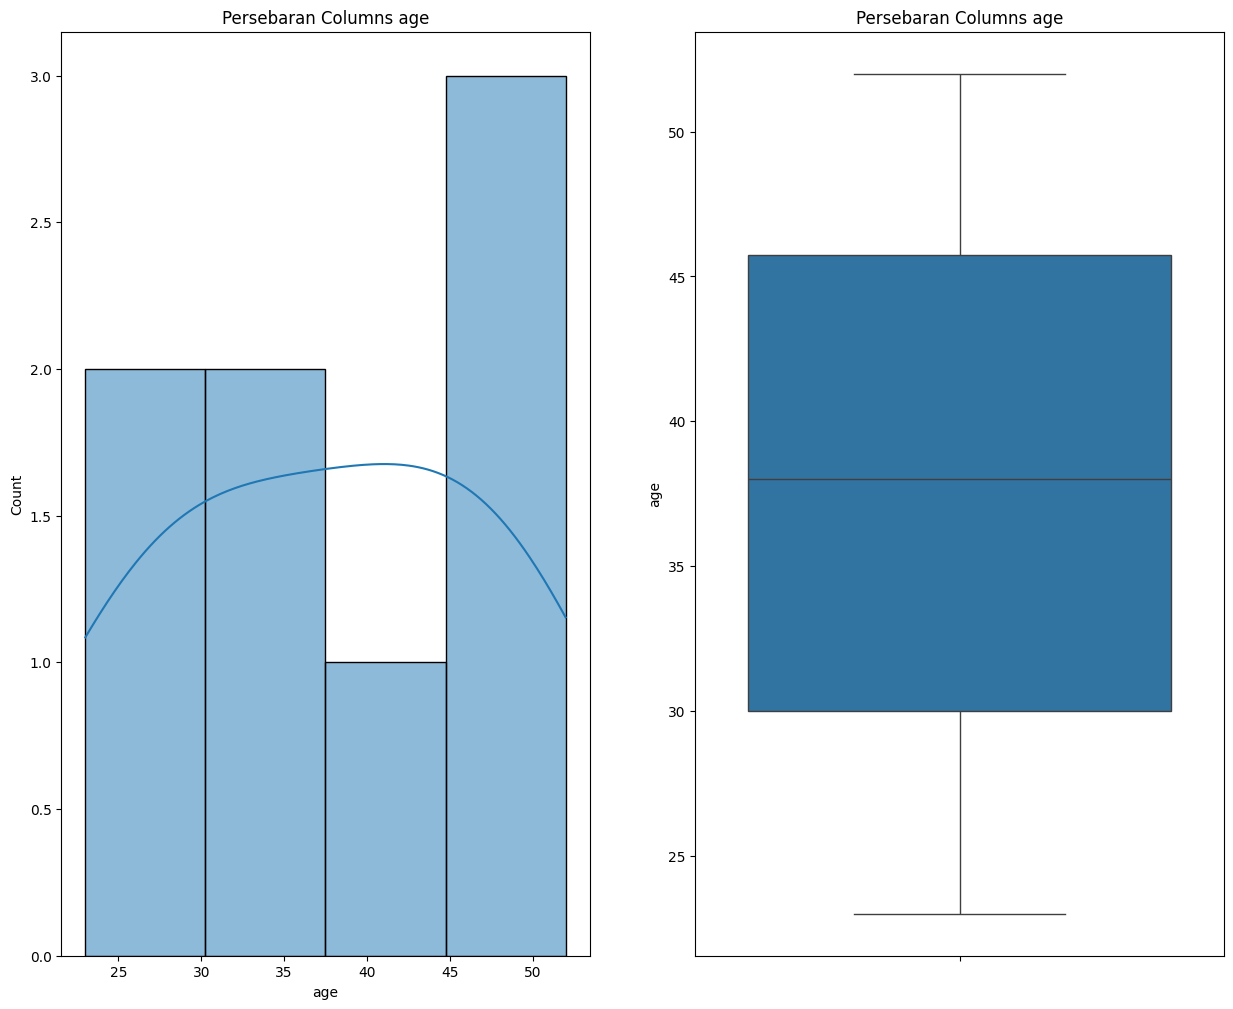

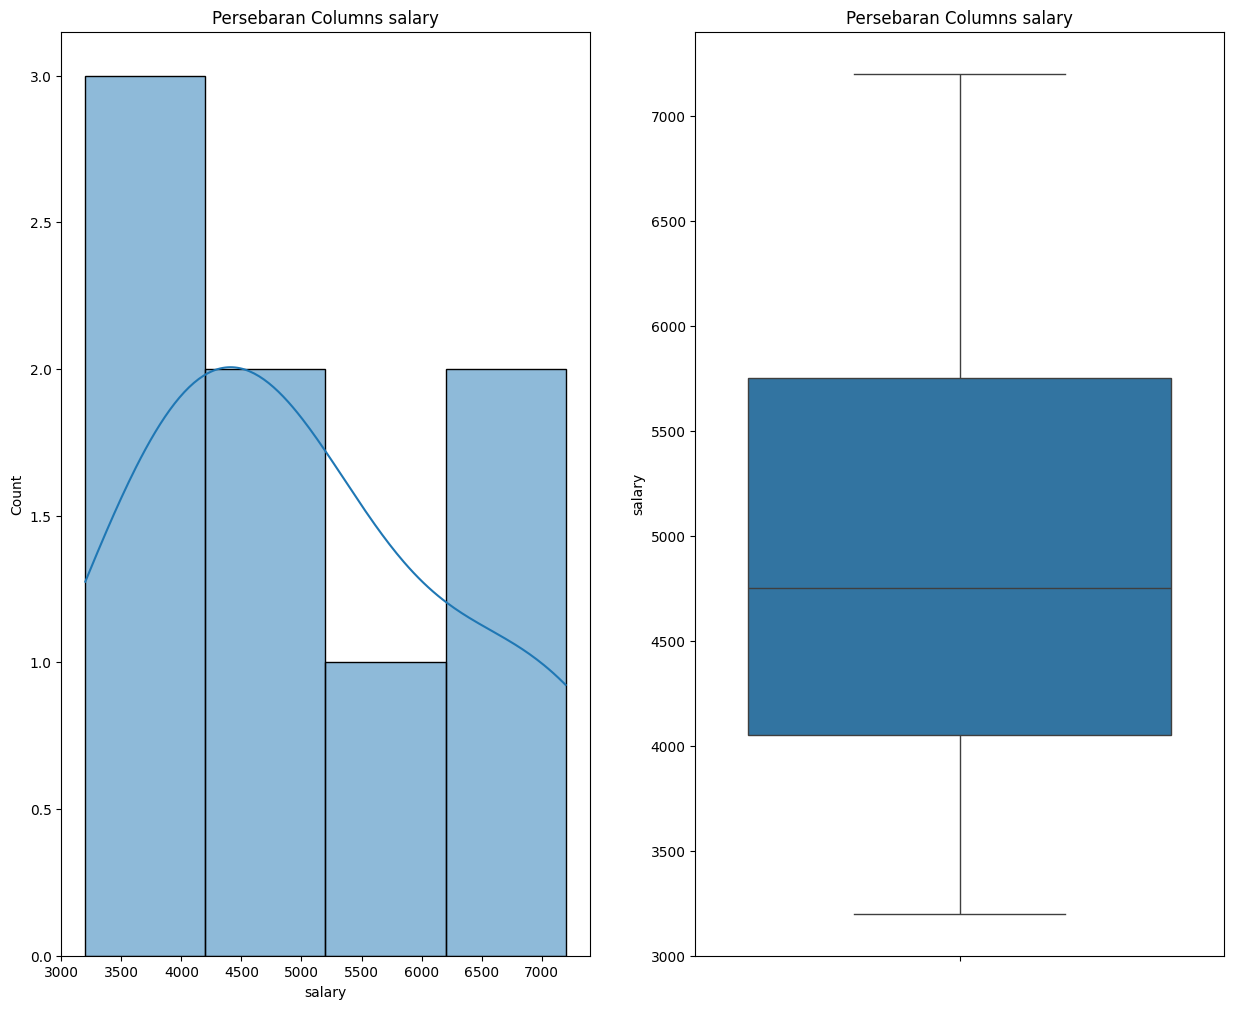

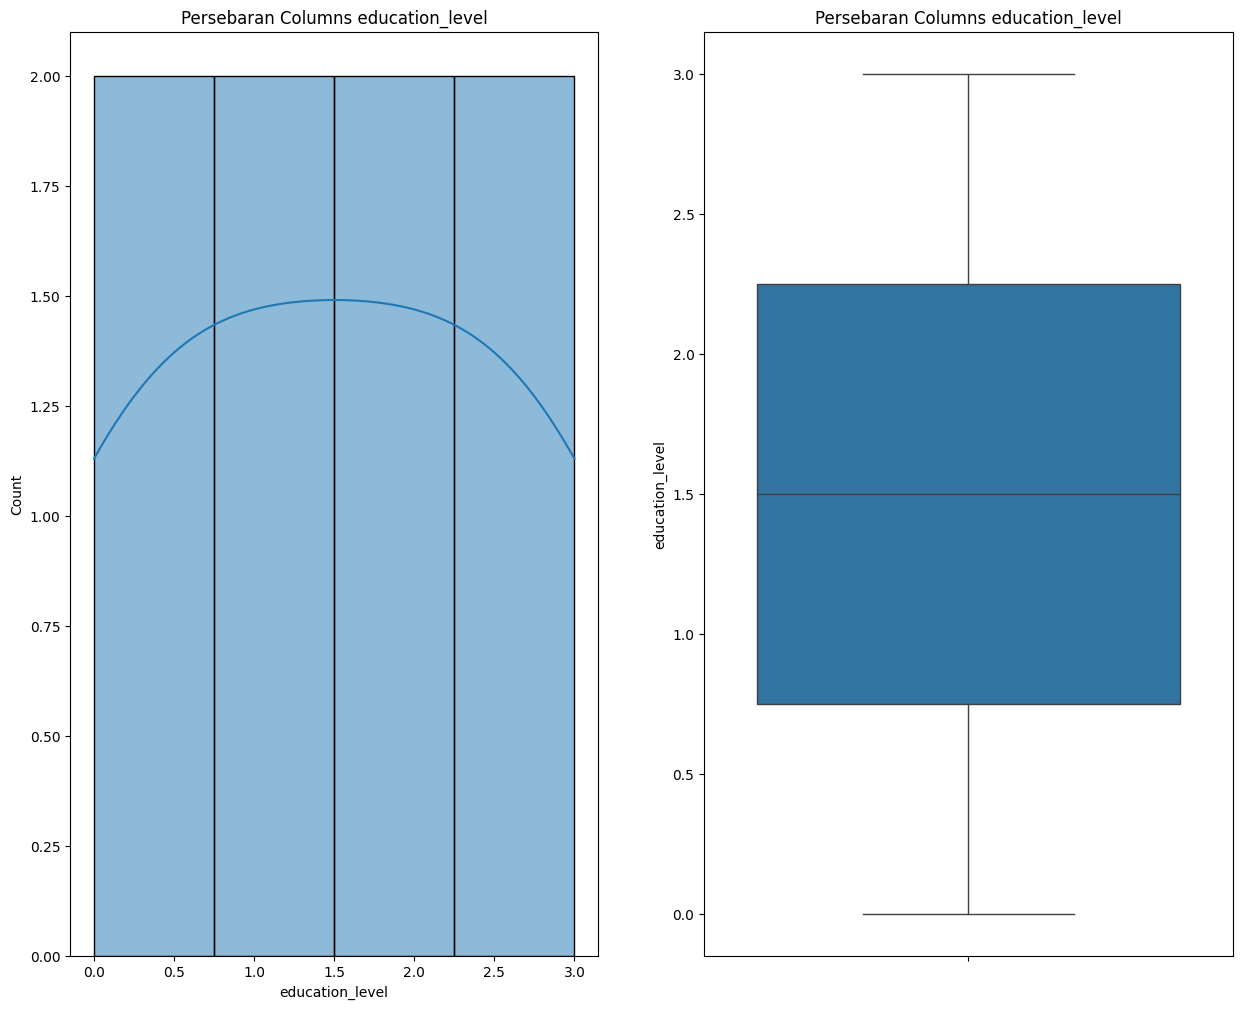

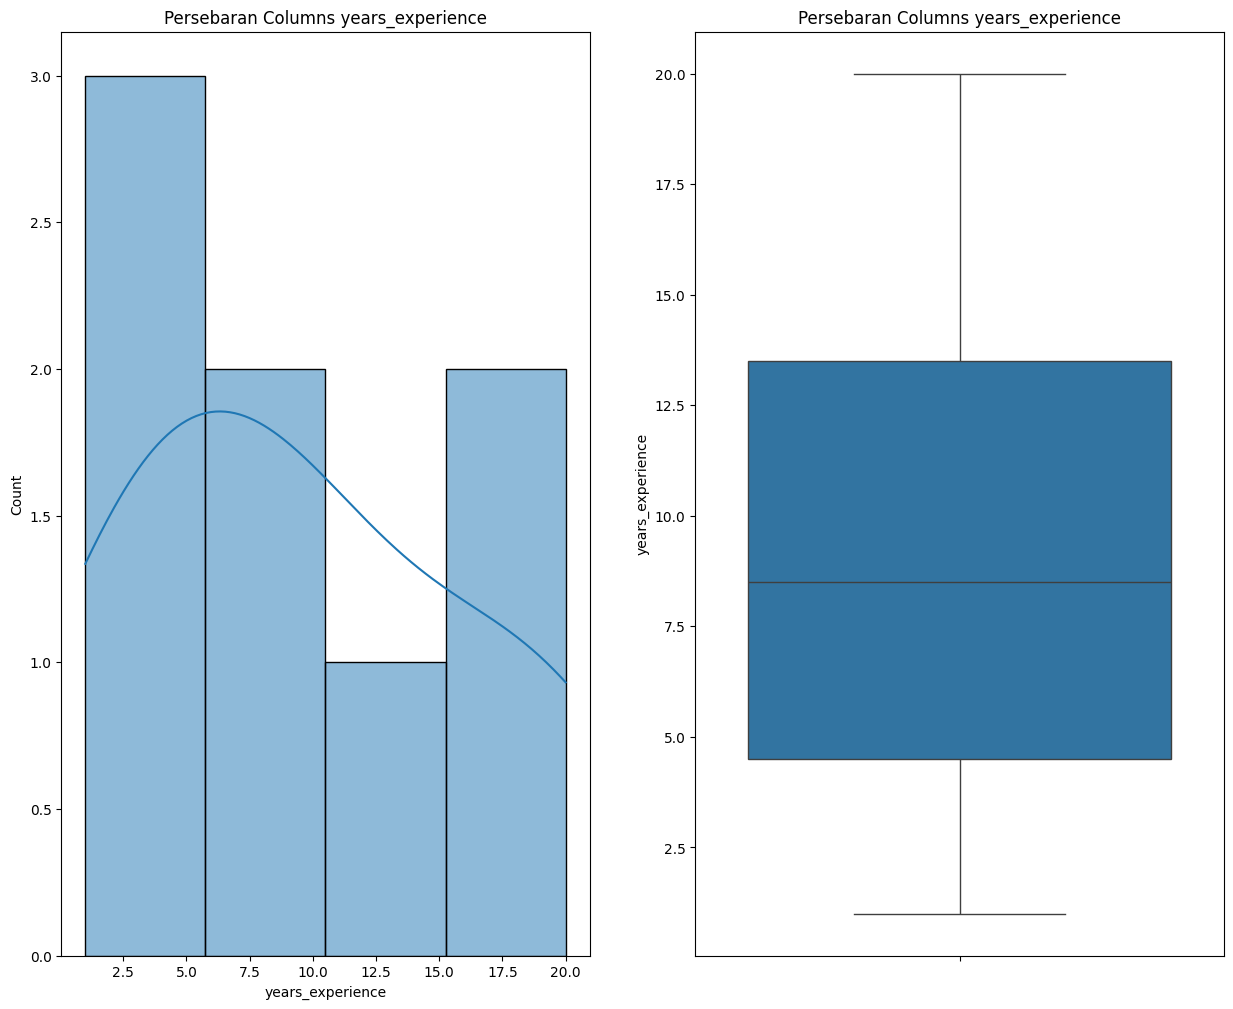

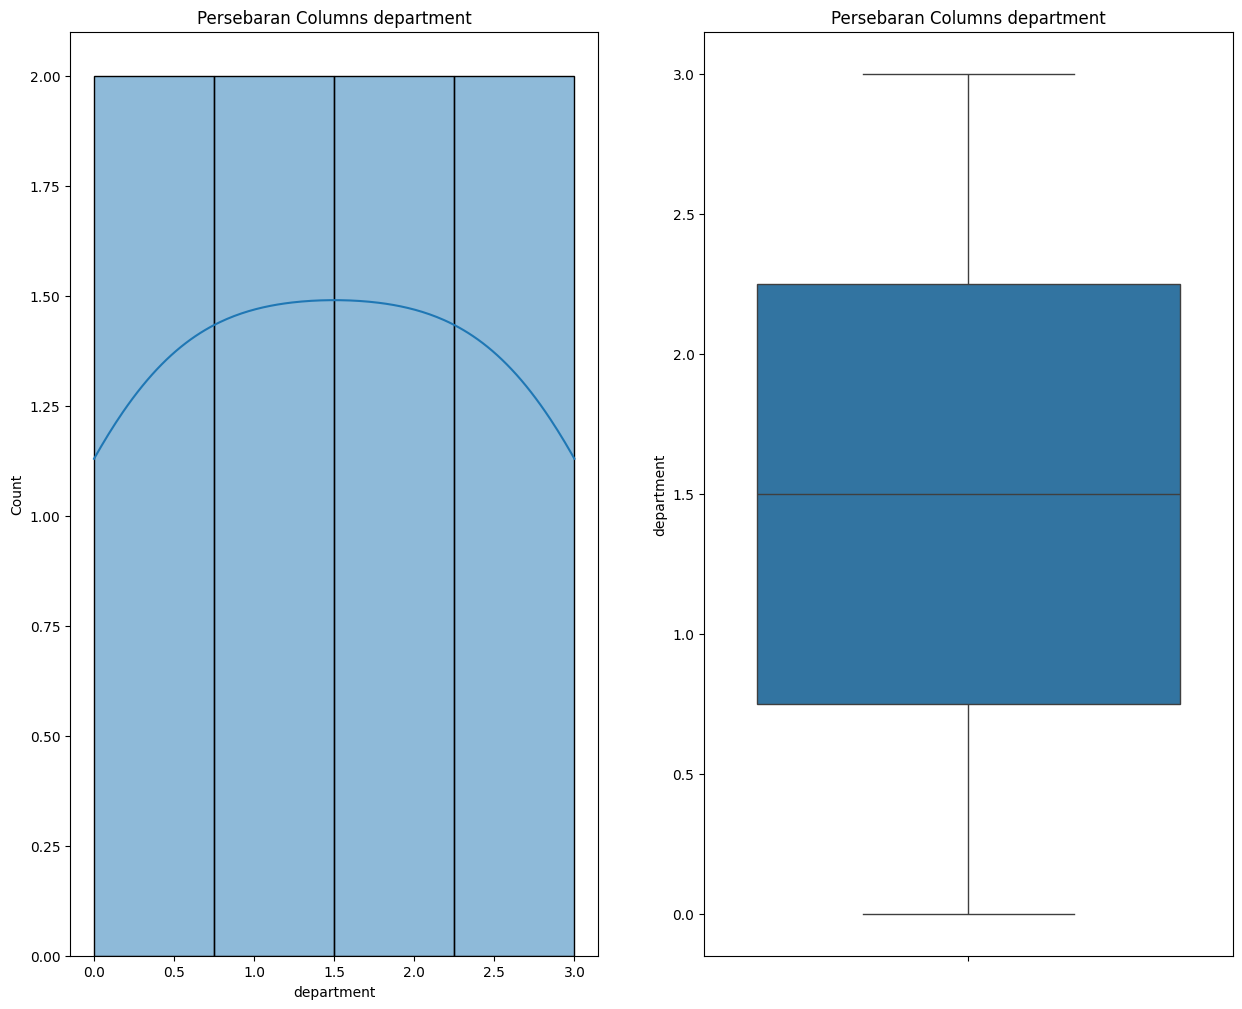

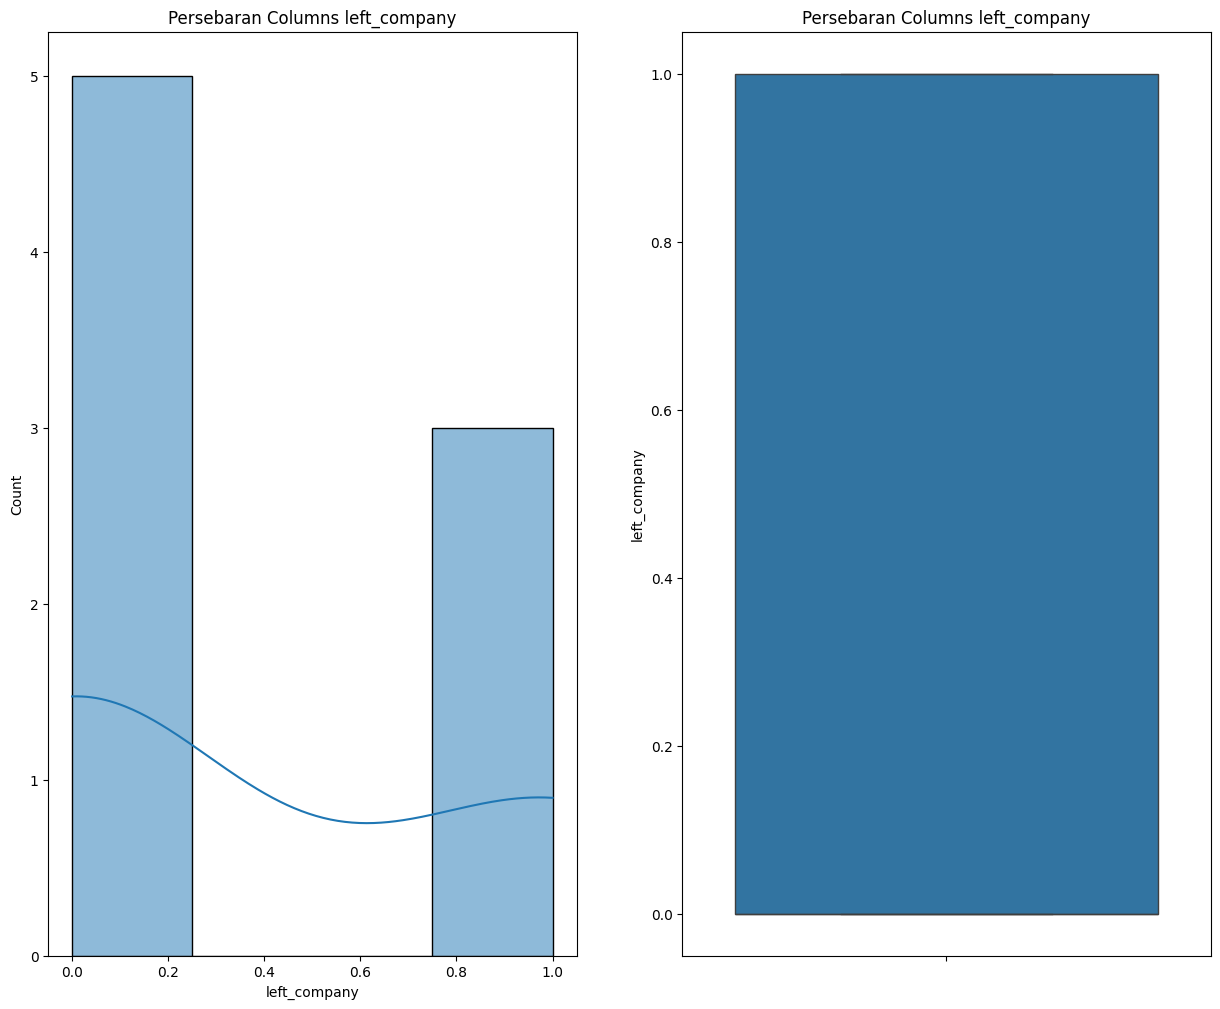

In [91]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 12))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
   

In [92]:
df.skew()

age                -0.069261
salary              0.554373
education_level     0.000000
years_experience    0.466060
department          0.000000
left_company        0.644061
dtype: float64

### A.9 Analisis Korelasi

In [93]:
num = df.select_dtypes(include='number')

<Axes: >

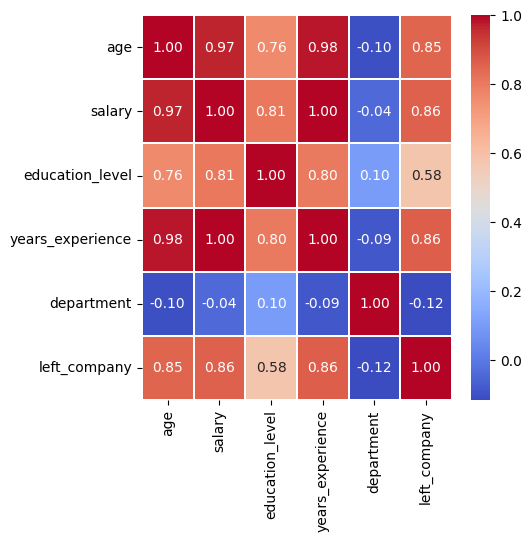

In [94]:
plt.figure(figsize=(5,5))
sns.heatmap(num.corr(),
            annot=True,
            fmt='.2f',
            linewidths=1.1,
            cmap='coolwarm')

### A.10 Analisis Kategori

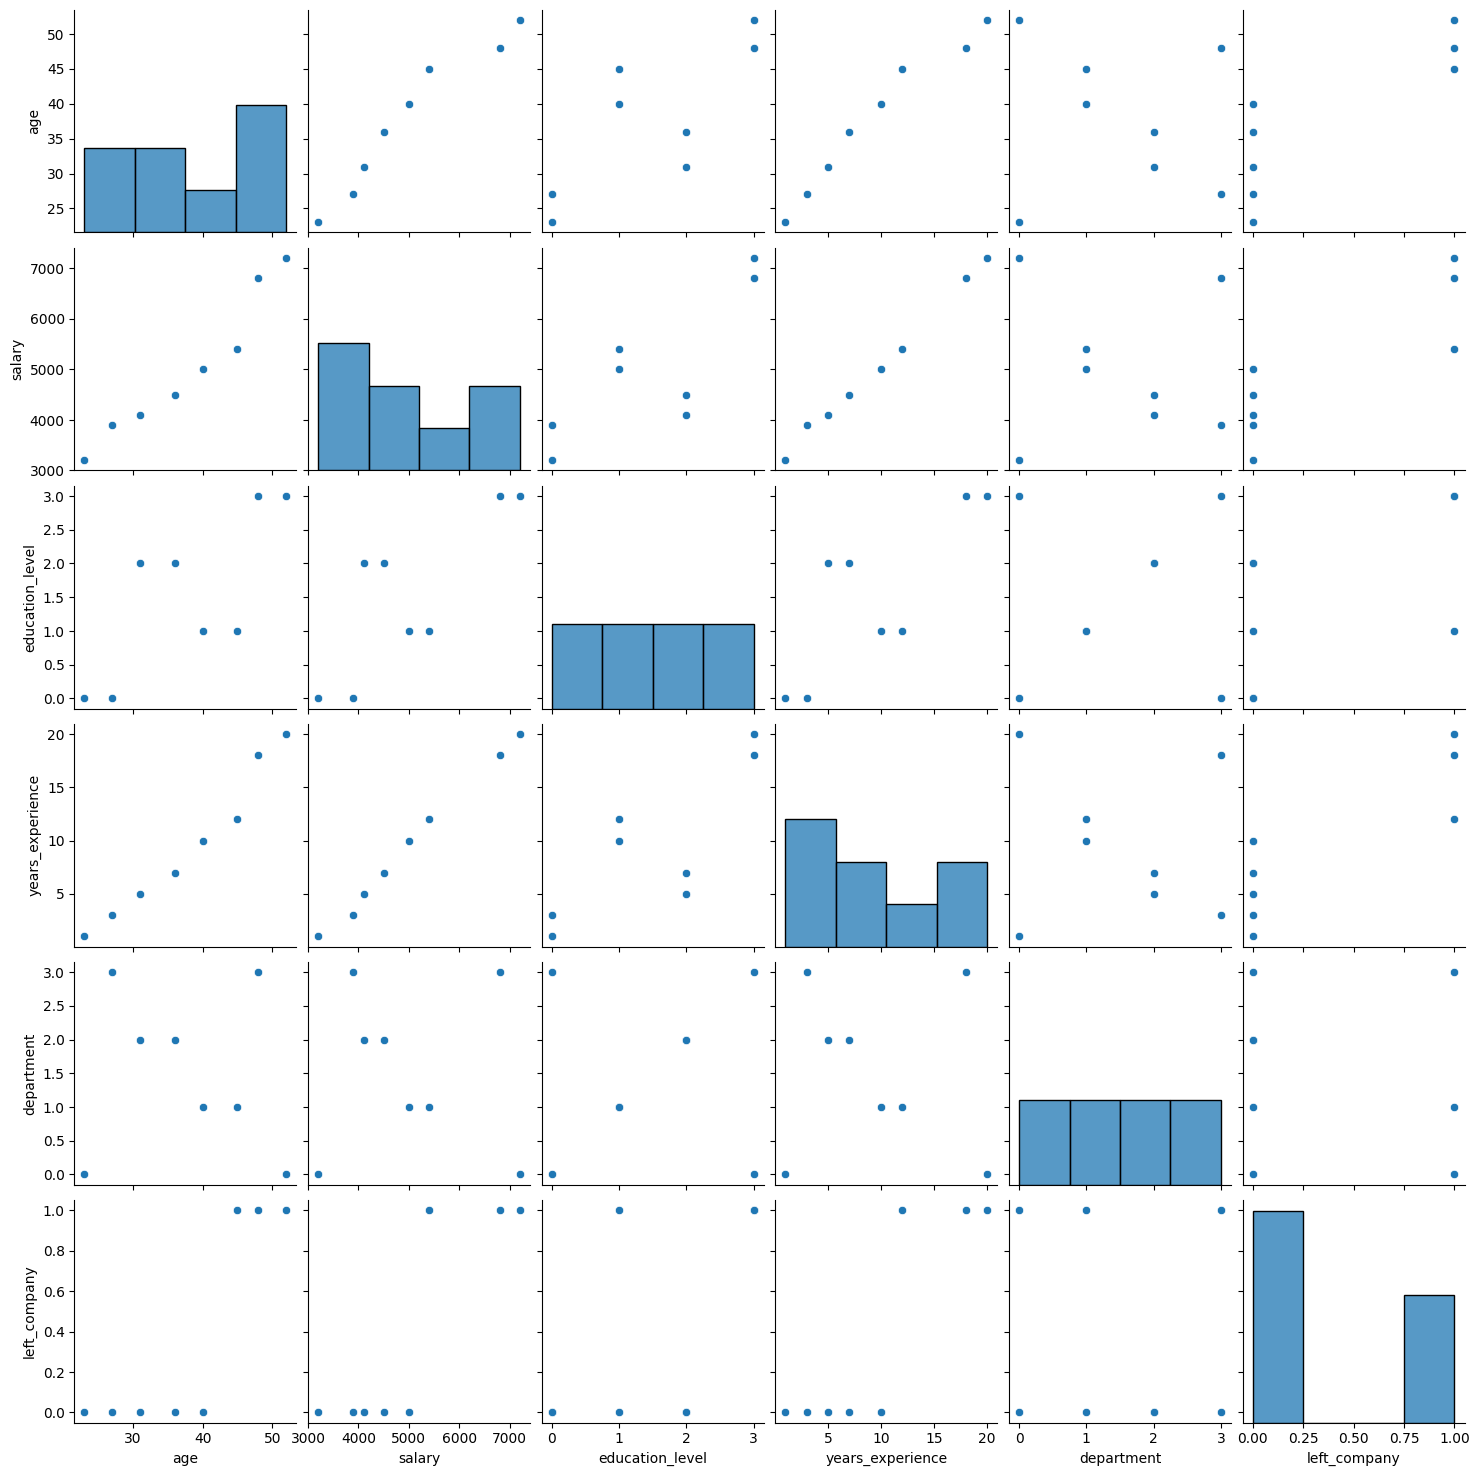

In [101]:
sns.pairplot(df)

<Axes: xlabel='department', ylabel='count'>

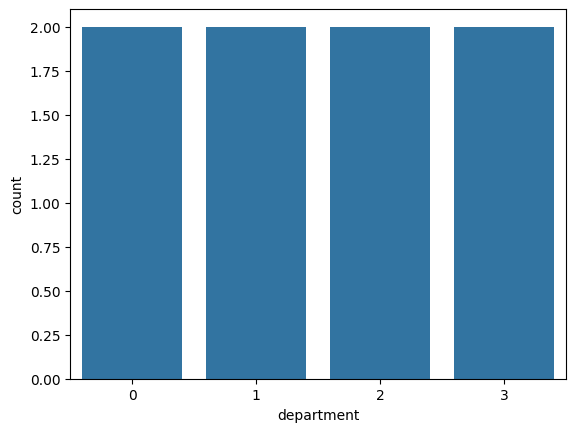

In [95]:
sns.countplot(df, x=df['department'])

<Axes: xlabel='education_level', ylabel='count'>

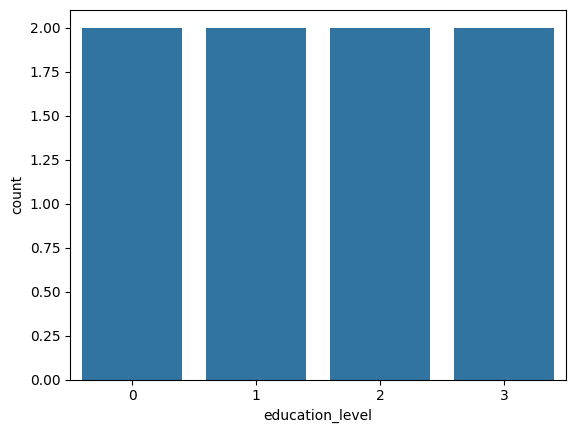

In [96]:
sns.countplot(df, x=df['education_level'])

### A.11 Data Cleaning

In [97]:
feature = df.drop(columns=['left_company'])
target = df['left_company']

In [98]:
feature_norm = (feature - feature.min()) / (feature.max() - feature.min())

In [99]:
df_norm = pd.concat([feature_norm, target], axis=1)

In [100]:
df_norm

,age,salary,education_level,years_experience,department,left_company
0,0.000000,0.000,0.000000,0.000000,0.000000,0
1,0.758621,0.550,0.333333,0.578947,0.333333,1
2,0.275862,0.225,0.666667,0.210526,0.666667,0
3,1.000000,1.000,1.000000,1.000000,0.000000,1
4,0.137931,0.175,0.000000,0.105263,1.000000,0
5,0.586207,0.450,0.333333,0.473684,0.333333,0
6,0.448276,0.325,0.666667,0.315789,0.666667,0
7,0.862069,0.900,1.000000,0.894737,1.000000,1


## Insight

- Pola = Karyawan dengan pengalaman kerja (Tahunan) tinggi cenderung melakukan resign daripada Karyawan dengan pengalaman kerja rendah
- Hubungan = Kolom Age dan Kolom Years_Experience berpengaruh pada Target Left_Company (Karyawan melakukan resign atau tidak)
- Hipotesis = Karyawan yang sudah bekerja lama di perusahaan cenderung melakukan resign, dan karyawan yang umurnya diatas 40 tahun cenderung melakukan resign
